In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading the data set
basepath = "C:\\Gaurav Work\\ML\\machine-learning\\all_datasets_collection\\"
filename = "mnist-train.csv"
data = pd.read_csv(basepath + filename)


In [3]:
data.shape


(42000, 785)

In [4]:
data.head()


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [5]:
#lets print some of the images
#to do this we need to drop the label column from dataset
#because we need to create this back to 28x28 pixle image
i=199
features = data.drop('label',axis=1)
labels = data['label']

print("Shape of Features matirx - ", features.shape)
print("Shape of Labels matirx - ", labels.shape)


Shape of Features matirx -  (42000, 784)
Shape of Labels matirx -  (42000,)


C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


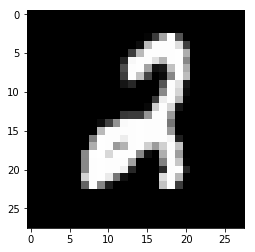

2


In [6]:
d = features.iloc[i].as_matrix().reshape(28,28)
plt.imshow(d, cmap='gray')
plt.show()

#this is to check whether it(above line) shows correct result corrospoding to label
print(data.iloc[i,0])


In [7]:
#Lets perform PCA with manual steps for Visualization in 2D
#Steps to perform PCA

#1. Get Matirx X and pefrom Column standardization on features (by removing labels)
#2. Calculate Co-variance matirx
#3. Calculate eigan values and eigna vectors
#4. Get top 2 for 2D or 3 for 3D or d for dD eigan vectors
#5. Calculate projection of Matrix X witb Eigan Vectors in 2D, or 3D
#6. Combine ir Add labels with projected matrix
#6. Plot Matrix on graph

#Lets peform Colmun standardization
from sklearn.preprocessing import StandardScaler
col_std_data = StandardScaler().fit_transform(features)
print("Shape of column Standardized Matirx - ", col_std_data.shape)

#Calculate co-variance matix
co_var_matrix = np.matmul(col_std_data.T, col_std_data)
print("Shape of co-variance matrix - ", co_var_matrix.shape)

#caluclate eigan values and vectors and fetch 2 vectors
from scipy.linalg import eigh
eigan_values, eigan_vector = eigh(co_var_matrix, eigvals=(782,783))
print("Shape of eigan vectors - ", eigan_vector.shape)

#Calculate Projection of New points with Matrix
projected_data = np.matmul(eigan_vector.T, col_std_data.T)      # 2x784 . 784x42000 = 2 x 42000
print("Shape of projected matirx - ", projected_data.shape)


C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Shape of column Standardized Matirx -  (42000, 784)


Shape of co-variance matrix -  (784, 784)
Shape of eigan vectors -  (784, 2)
Shape of projected matirx -  (2, 42000)


In [8]:

#combine or add labels with projected matirx
data_with_labels = np.vstack((labels,projected_data)).T
print("Shape of final pca dta matrix with labels - ", data_with_labels.shape)

#Provide the name of the columns added thorugh PCA
pca_data = pd.DataFrame(data_with_labels, columns=['first_col','second_col','label'])


Shape of final pca dta matrix with labels -  (42000, 3)


In [9]:
import seaborn as sns


C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


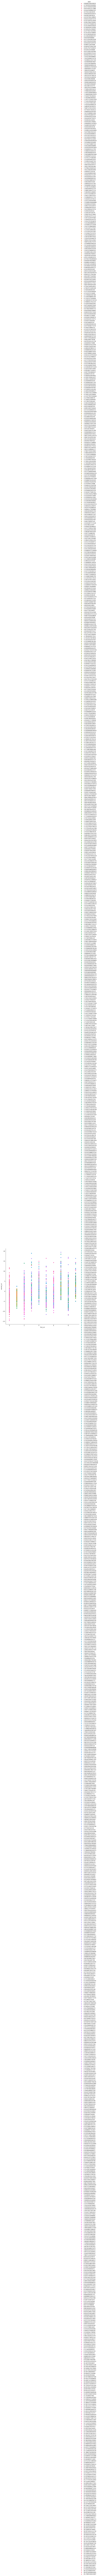

In [10]:
sns.FacetGrid(pca_data.head(1500), hue="label", size=10) \
.map(plt.scatter, "first_col", "second_col") \
.add_legend()
plt.show()

In [11]:
pca_data.head()

first_col  second_col      label
0        1.0   -5.226445  -5.140478
1        0.0    6.032996  19.292332
2        1.0   -1.705813  -7.644503
3        4.0    5.836139  -0.474207
4        0.0    6.024818  26.559574

In [12]:
data_with_labels = np.vstack((projected_data, labels)).T

In [13]:
pca_data = pd.DataFrame(data_with_labels, columns=['first_col','second_col','label'])

In [14]:
pca_data.head()

first_col  second_col  label
0  -5.226445   -5.140478    1.0
1   6.032996   19.292332    0.0
2  -1.705813   -7.644503    1.0
3   5.836139   -0.474207    4.0
4   6.024818   26.559574    0.0

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


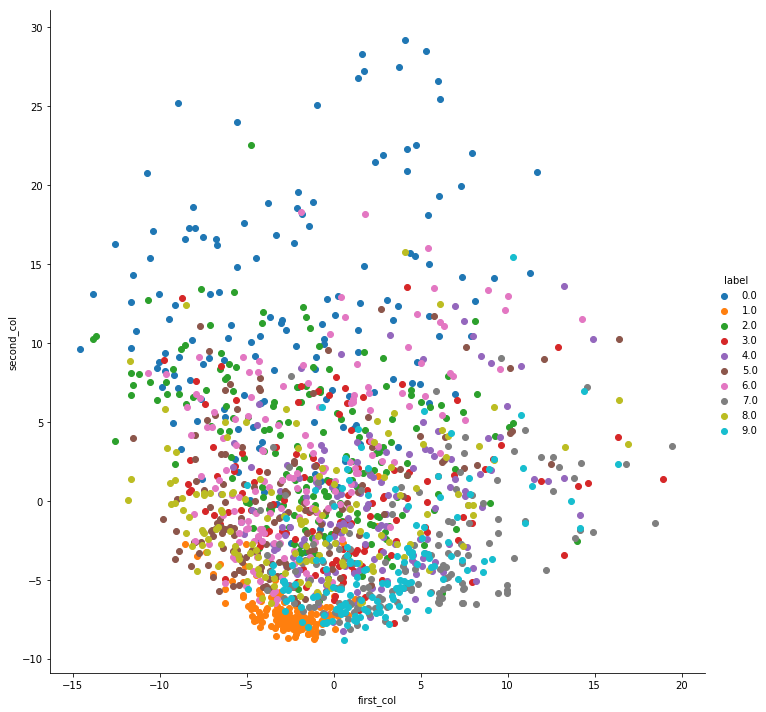

In [15]:

sns.FacetGrid(pca_data.head(1500), hue="label", size=10) \
.map(plt.scatter, "first_col", "second_col") \
.add_legend()
plt.show()

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


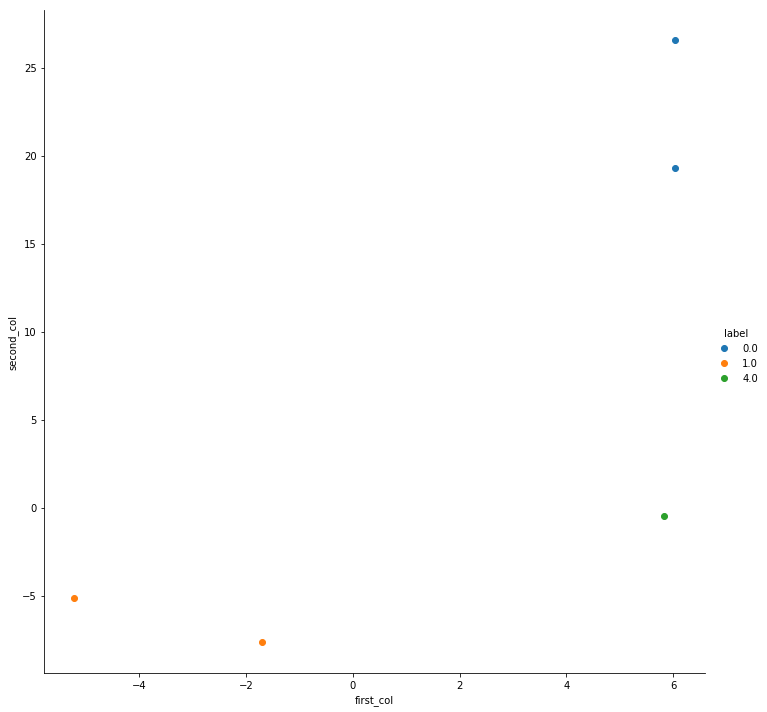

In [16]:
sns.FacetGrid(pca_data.head(), hue="label", size=10) \
.map(plt.scatter, "first_col", "second_col") \
.add_legend()
plt.show()

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


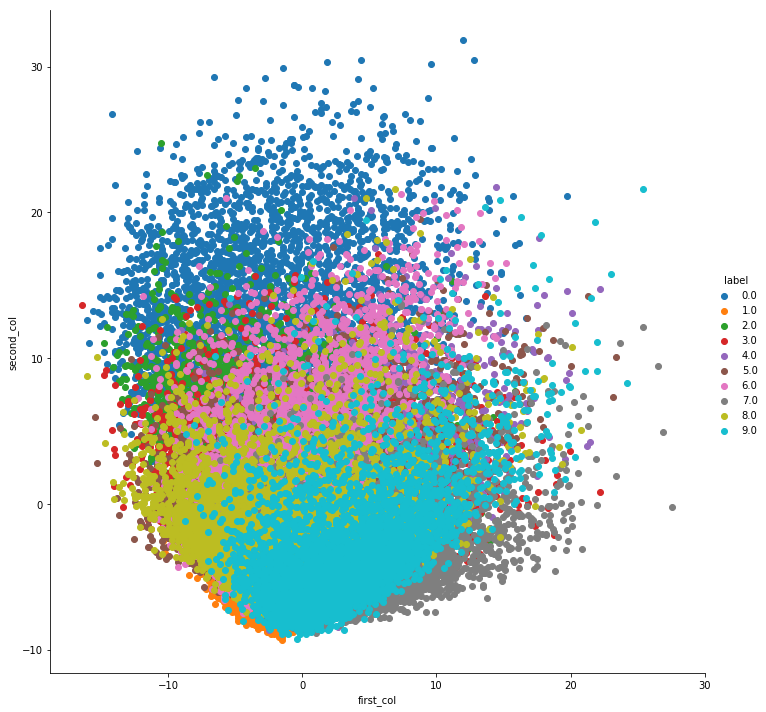

In [17]:
sns.FacetGrid(pca_data, hue="label", size=10) \
.map(plt.scatter, "first_col", "second_col") \
.add_legend()
plt.show()

In [18]:
from sklearn import decomposition
pca = decomposition.PCA()


In [19]:
pca = decomposition.PCA(n_components=2)

In [20]:
pca_data = pca.fit_transform(features)

In [21]:
print("Shape of pca_data is - ", pca_data.shape)

Shape of pca_data is -  (42000, 2)


In [22]:
pca_data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
pca_data

array([[-661.59429286, -699.3095402 ],
       [1701.452311  , -360.54694328],
       [-886.89627387, -293.74469518],
       ...,
       [ 336.2719786 ,  950.02459709],
       [ 327.39980055,   61.99788847],
       [-364.24799051,  418.85900171]])

In [24]:
pca_data[0]

array([-661.59429286, -699.3095402 ])

In [25]:
pca_data_labels =  np.vstack((pca_data, labels)).T

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [26]:
labels

0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [27]:
labels.shape

(42000,)

In [28]:
pca_data_labels =  np.vstack((pca_data, labels)).T

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [29]:
pca_data_labels =  np.vstack((pca_data, labels))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [30]:
pca_data.shape

(42000, 2)

In [31]:
pca_data_labels = np.vstack((pca_data.T, labels))

In [32]:
pca_data_labels.shape = np.vstack((pca_data.T, labels))

TypeError: only integer scalar arrays can be converted to a scalar index

In [33]:
pca_data_labels.shape()

TypeError: 'tuple' object is not callable

In [34]:
pca_data_labels

array([[-6.61594293e+02,  1.70145231e+03, -8.86896274e+02, ...,
         3.36271979e+02,  3.27399801e+02, -3.64247991e+02],
       [-6.99309540e+02, -3.60546943e+02, -2.93744695e+02, ...,
         9.50024597e+02,  6.19978885e+01,  4.18859002e+02],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         7.00000000e+00,  6.00000000e+00,  9.00000000e+00]])

In [35]:
pca_data_labels = np.vstack((pca_data.T, labels)).T

In [36]:
pca_data_labels

array([[-6.61594293e+02, -6.99309540e+02,  1.00000000e+00],
       [ 1.70145231e+03, -3.60546943e+02,  0.00000000e+00],
       [-8.86896274e+02, -2.93744695e+02,  1.00000000e+00],
       ...,
       [ 3.36271979e+02,  9.50024597e+02,  7.00000000e+00],
       [ 3.27399801e+02,  6.19978885e+01,  6.00000000e+00],
       [-3.64247991e+02,  4.18859002e+02,  9.00000000e+00]])

In [37]:
pca_data_labels.shape

(42000, 3)

In [38]:
pca_data_labels = np.vstack((pca_data.T, labels))

In [39]:
pca_data_labels.shape

(3, 42000)

In [40]:
plot_data = pd.DataFrame(pca_data_labels, columns=['2_col','1_col','label'])

ValueError: Shape of passed values is (42000, 3), indices imply (3, 3)

In [41]:
pca_data_labels.shape

(3, 42000)

In [42]:
pca_data_labels = np.vstack((pca_data.T, labels)).T

In [43]:
plot_data = pd.DataFrame(pca_data_labels, columns=['2_col','1_col','label'])

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


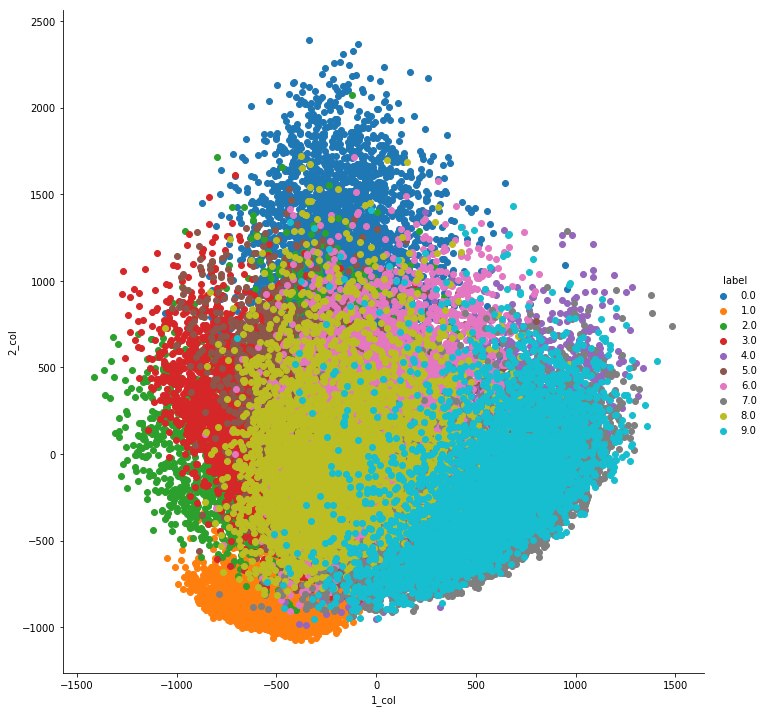

In [44]:
import seaborn as sns

sns.FacetGrid(plot_data, hue="label", size=10) \
.map(plt.scatter, "1_col", "2_col") \
.add_legend()
plt.show()


In [45]:
eigan_values.shape

(2,)

In [46]:
import pandas as pd
import numy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

ModuleNotFoundError: No module named 'numy'

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [48]:
cancer_data.shape

AttributeError: shape

In [49]:
cancer_data = pd.DataFrame(cancer_data)

ValueError: arrays must all be same length

In [50]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [51]:
cancer_data.DESC

AttributeError: DESC

In [52]:
print cancer_data.desc

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(cancer_data.desc)? (<ipython-input-52-0cdd3a3b4047>, line 1)

In [53]:
print(cancer_data.desc)

AttributeError: desc

In [54]:
print(cancer_data.DESC)

AttributeError: DESC

In [55]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [56]:
print(cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [57]:
print(type(cancer_data))

<class 'sklearn.utils.Bunch'>


In [58]:
print(cancer_data['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [59]:
cancer_data = pd.DataFrame(
    data=np.c_[cancer_data['data'], cancer_data['target']],
    columns=cancer_data['feature_names'] + ['target'])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [60]:
cancer_data = pd.DataFrame(
    data=np.c_[cancer_data['data'], cancer_data['target']],
    columns=cancer_data['feature_names'] + cancer_data['target'])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [61]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [62]:
data = pd.DataFrame(
    data=np.c_[cancer_data['data'], cancer_data['target']],
    columns=cancer_data['feature_names'] + cancer_data['target'])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [63]:
data = pd.DataFrame(data=np.c_[cancer_data['data'], cancer_data['target']], columns=cancer_data['feature_names'] + cancer_data['target'])

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [64]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [65]:
cancer_data['feature_names'] + ['target']

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [66]:
cancer_data['feature_names'], ['target']

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 ['target'])

In [67]:
cancer_data['feature_names'] + ['target']

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [68]:
cancer_data['feature_names'] + ['target']

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U23') dtype('<U23') dtype('<U23')

In [69]:
c_data = pd.DataFrame(
    data=np.c_[cancer_data['data']], 
    columns=cancer_data['feature_names'])

In [70]:
cancer_data['feature_names'].tolist() + ['target']

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [71]:
cancer_data = pd.DataFrame(
    data=np.c_[cancer_data['data'], cancer_data['target']], 
    columns=cancer_data['feature_names'].tolist() + ['target'])

In [72]:
cancer_data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0          0.09710   
12        19.170         24.80          132.40     1123.0          0.09740   
13        15.850         23.95          103.70      782.7          0.08401   
14        13.730         22.61           93.60      578.3          0.11310   
15        14.540         27.54           96.73      658.8          0.11390   
16        14.680         20.13           94.74      684.5          0.09867   
17        16.130         20.68          108.10      798.8          0.11700   
18        19.810         22.15          130.00     1260.0          0.09831   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
22        15.340         14.26          102.50      704.4          0.10730   
23        21.160         23.04          137.20     1404.0          0.09428   
24        16.650         21.38          110.00      904.6          0.11210   
25        17.140         16.40          116.00      912.7          0.11860   
26        14.580         21.53           97.41      644.8          0.10540   
27        18.610         20.25          122.10     1094.0          0.09440   
28        15.300         25.27          102.40      732.4          0.10820   
29        17.570         15.05          115.00      955.1          0.09847   
..           ...           ...             ...        ...              ...   
539        7.691         25.44           48.34      170.4          0.08668   
540       11.540         14.44           74.65      402.9          0.09984   
541       14.470         24.99           95.81      656.4          0.08837   
542       14.740         25.42           94.70      668.6          0.08275   
543       13.210         28.06           84.88      538.4          0.08671   
544       13.870         20.70           89.77      584.8          0.09578   
545       13.620         23.23           87.19      573.2          0.09246   
546       10.320         16.35           65.31      324.9          0.09434   
547       10.260         16.58           65.85      320.8          0.08877   
548        9.683         19.34           61.05      285.7          0.08491   
549       10.820         24.21           68.89      361.6          0.08192   
550       10.860         21.48           68.51      360.5          0.07431   
551       11.130         22.44           71.49      378.4          0.09566   
552       12.770         29.43           81.35      507.9          0.08276   
553        9.333         21.94           59.01      264.0          0.09240   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
556       10.160         19.59           64.73      311.7          0.10030   
557        9.423         27.88           59.26      271.3          0.08123   
558       14.590         22

In [73]:
print(cancer_data.shape)

(569, 31)


In [74]:
print(cancer_data['target'].count)

<bound method Series.count of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64>


In [75]:
print(cancer_data['target'].value_counts())

1.0    357
0.0    212
Name: target, dtype: int64


In [76]:
from sklearn import decomposition
pca = decomposition().pca(cancer_data)



TypeError: 'module' object is not callable

In [77]:
pca = decomposition.PCA(cancer_data)

In [78]:
pca = decomposition.PCA(n_components=2)

In [79]:
print(pca_data.shape)

(42000, 2)


In [80]:
pca_data = pca.fit_transform(cancer_data)

In [81]:
print(pca_data.shape)

(569, 2)


In [82]:
target = cancer_data['target']

In [83]:
features_data = cancer_data.drop['target']

TypeError: 'method' object is not subscriptable

In [84]:
features_data = cancer_data.drop('target')

KeyError: "['target'] not found in axis"

In [85]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [86]:
features_data = cancer_data.drop('target',1)

In [87]:
pca_data = pca.fit_transform(features_data)
print(pca_data.shape)



(569, 2)


In [88]:
pca_data_labels = np.vstack(pca_datam target)

SyntaxError: invalid syntax (<ipython-input-88-3e68fbc1cd22>, line 1)

In [89]:
pca_data_labels = np.vstack(pca_data,target)

TypeError: vstack() takes 1 positional argument but 2 were given

In [90]:
pca_data_labels = np.vstack((pca_data,target))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [91]:
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [92]:
print(pca_data.shape)

print(target.shape)


(569, 2)
(569,)


In [93]:
pca_data_labels = np.vstack((pca_data.T,target)).T

In [94]:
pca_data_labels

array([[ 1.16014257e+03, -2.93917544e+02,  0.00000000e+00],
       [ 1.26912244e+03,  1.56301818e+01,  0.00000000e+00],
       [ 9.95793889e+02,  3.91567432e+01,  0.00000000e+00],
       ...,
       [ 3.14501756e+02,  4.75535252e+01,  0.00000000e+00],
       [ 1.12485812e+03,  3.41292250e+01,  0.00000000e+00],
       [-7.71527622e+02, -8.86431064e+01,  1.00000000e+00]])

In [95]:
print(pca_data_labels.shape)

(569, 3)


In [96]:
plot_data = pd.DataFrame(pca_data_labels, 
        columns=['1_col', '2_col', 'target'])


In [97]:
sns.Facetgrid(plot_data, hue='target', size=6)
.map(plt.scatter, '1_col', '2_col')
.add_legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-97-e7cfbb6c44f9>, line 2)

In [98]:
sns.Facetgrid(plot_data, hue='target', size=6)
.map(plt.scatter, "1_col", "2_col")
.add_legend()

plt.show()

SyntaxError: invalid syntax (<ipython-input-98-a7724b9569a2>, line 2)

In [99]:
sns.Facetgrid(plot_data, hue='target', size=6) \
.map(plt.scatter, "1_col", "2_col") \
.add_legend()

plt.show()

AttributeError: module 'seaborn' has no attribute 'Facetgrid'

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


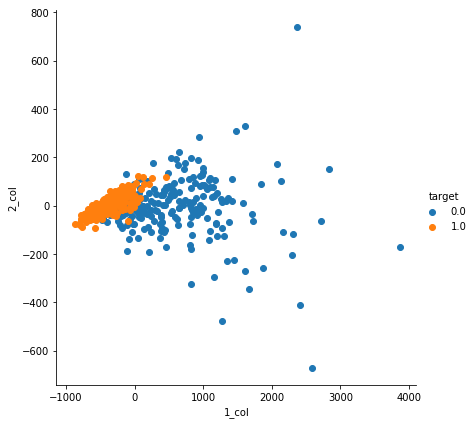

In [100]:
sns.FacetGrid(plot_data, hue='target', size=6) \
.map(plt.scatter, "1_col", "2_col") \
.add_legend()

plt.show()

In [101]:
explained_var = pca.explained_variance_

In [102]:
explained_var

array([443782.6051466 ,   7310.10006165])

In [103]:
features_data.shape

(569, 30)

In [104]:
ev_pca = decomposition.PCA(n_components=30)

In [105]:
ev_pca_data = ev_pca.fit_transform(features_data.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[569.  30.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [106]:
ev_pca_data = ev_pca.fit_transform(features_data)

In [107]:
ev_pca_data

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

In [108]:
ev_pca_data.shape

(569, 30)

In [109]:
explained_var = ev_pca.explained_variance_

In [110]:
explained_var

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01, 3.00458768e+00, 1.81533030e+00, 3.71466740e-01,
       1.55513547e-01, 8.40612196e-02, 3.16089533e-02, 7.49736514e-03,
       3.16165652e-03, 2.16150395e-03, 1.32653879e-03, 6.40269304e-04,
       3.74883320e-04, 2.35169626e-04, 1.84583467e-04, 1.64180064e-04,
       7.81102011e-05, 5.76111660e-05, 3.49172775e-05, 2.83952689e-05,
       1.61463677e-05, 1.24902419e-05, 3.68048171e-06, 2.84790425e-06,
       2.00491564e-06, 7.01997261e-07])

In [111]:
ev = ev_pca.explained_variance_

In [112]:
per_ev = ev_pca.explained_variance_ / np.sum(ev_pca.explained_variance_)

In [113]:
cum_ev = np.cumsum(per_ev)

In [114]:
per_ev

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [115]:
cum_ev

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

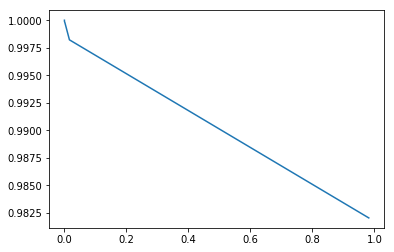

In [116]:
plt.plot(per_ev,cum_ev)

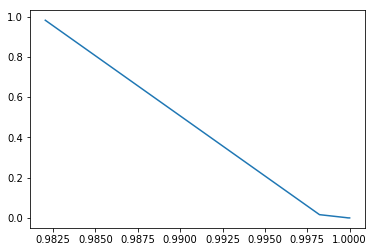

In [117]:
plt.plot(cum_ev,per_ev)

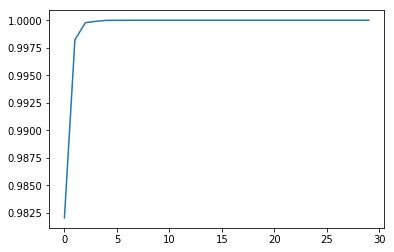

In [118]:
plt.plot(cum_ev)

In [119]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()#)

NameError: name 'cancer' is not defined

In [120]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer_dataer.feature_names)),
    cancer_data.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()#)

NameError: name 'cancer_dataer' is not defined

In [121]:
plt.xticks(range(len(cancer_data.feature_names)),
    cancer_data.feature_names,rotation=65,ha='left')


AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [122]:
cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

([<matplotlib.axis.XTick at 0x2712adc8e80>,
 <a list of 31 Text xticklabel objects>)

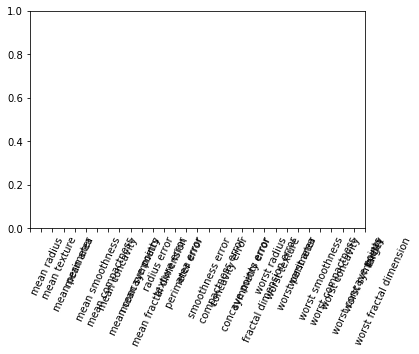

In [123]:
plt.xticks(range(len(cancer_data.columns)),
    cancer_data.columns,rotation=65,ha='left')


C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


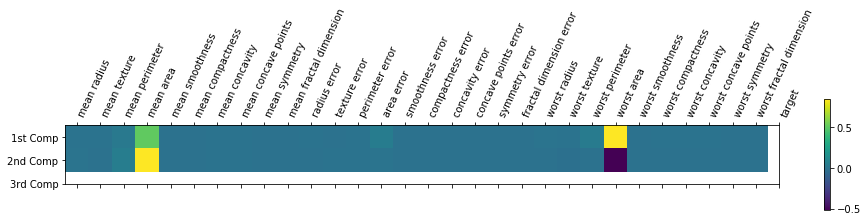

In [124]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer_data.columns)),
    cancer_data.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()#)

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


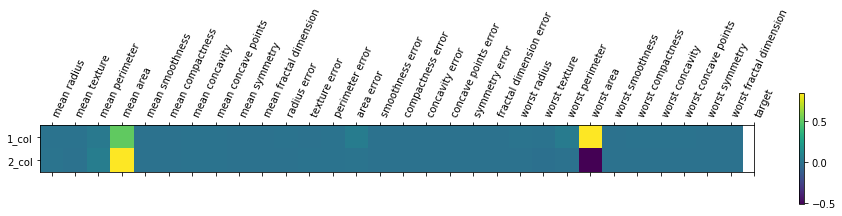

In [125]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['1_col','2_col'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer_data.columns)),
    cancer_data.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()#)

In [126]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [127]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [128]:
per_ev

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [129]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [130]:
whos?


In [131]:
who?

In [1]:
import pandas as pd

basepath = "C:\\Gaurav Work\\ML\\machine-learning\\all_datasets_collection\\"
filename = "mnist-train.csv"
data = pd.read_csv(basepath + filename)

In [2]:
data.shape

(42000, 785)

In [3]:
features = data.drop('label',1)
labels = data['label']


In [4]:
features.shape
labels.shape


(42000,)

In [5]:
features.shape

(42000, 784)

In [6]:
labels.shape

(42000,)

In [7]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)

In [8]:
tsne_data = model.fit_transform(features)

In [9]:
import numpy as np
tsne_data_labels = np.vstack((tsne_data.T,labels)).T


In [10]:
plot_data = pd.DataFrame(tsne_data_labels, columns=['col_1', 'col_2', 'labels'])

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
sns.FaceGrid(plot_data, hue='label').map(plt.scatter, 'col_1', 'col_2').add_legend()
plt.show()

AttributeError: module 'seaborn' has no attribute 'FaceGrid'

In [13]:
sns.FacetGrid(plot_data, hue='label').map(plt.scatter, 'col_1', 'col_2').add_legend()
plt.show()

KeyError: 'label'

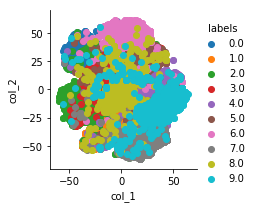

In [14]:
sns.FacetGrid(plot_data, hue='labels').map(plt.scatter, 'col_1', 'col_2').add_legend()
plt.show()

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


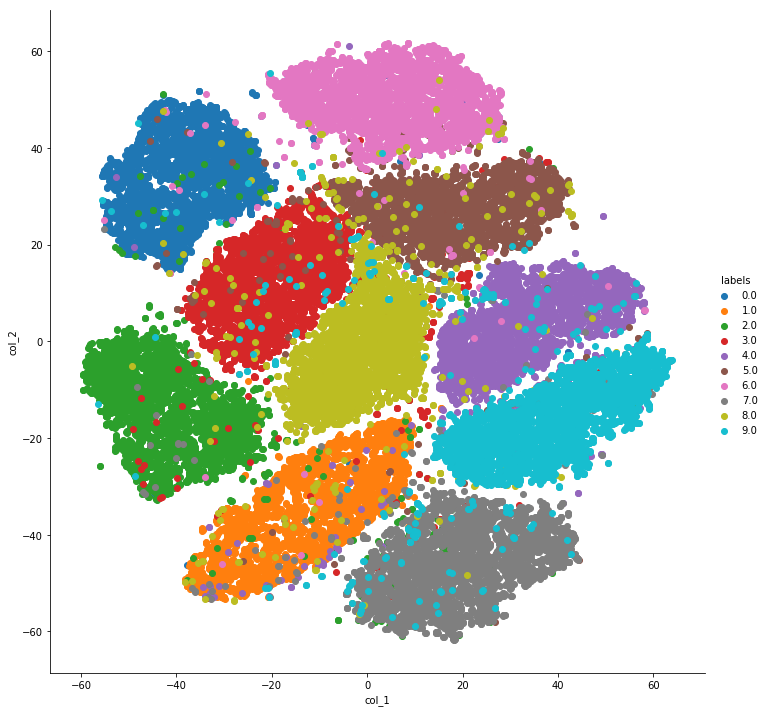

In [15]:
sns.FacetGrid(plot_data, hue='labels', size=10).map(plt.scatter, 'col_1', 'col_2').add_legend()
plt.show()

C:\Users\goyal.g\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


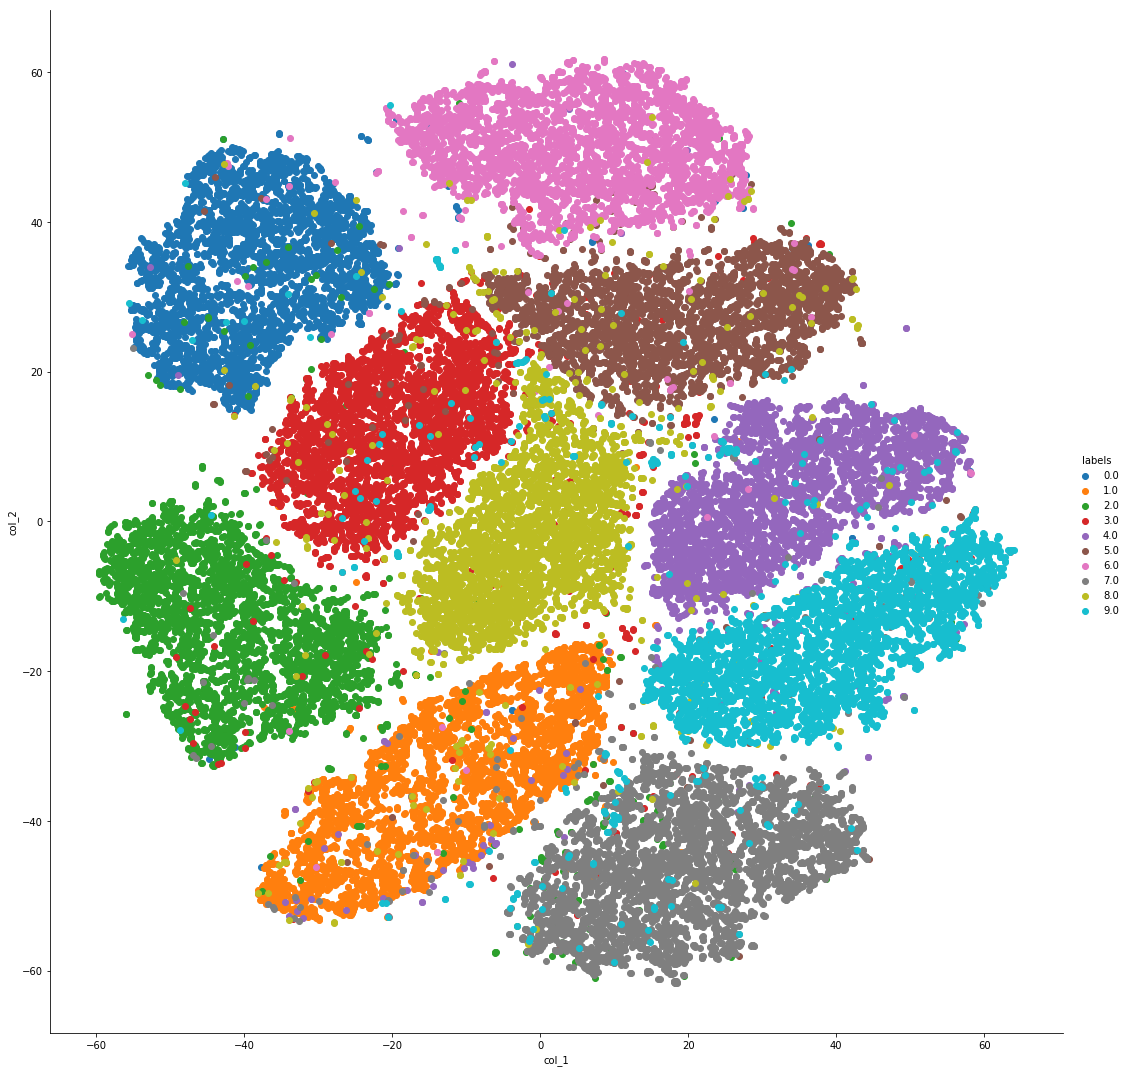

In [16]:
sns.FacetGrid(plot_data, hue='labels', size=15).map(plt.scatter, 'col_1', 'col_2').add_legend()
plt.show()